In [1]:
import pandas as pd

In [97]:
url = 'https://drive.google.com/file/d/1QcKzIJlO6WRUH4IkrKAvDmBVEipXkeQb/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243241 entries, 0 to 1243240
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1227632 non-null  float64
 1   tpep_pickup_datetime   1243241 non-null  object 
 2   tpep_dropoff_datetime  1243241 non-null  object 
 3   passenger_count        1227632 non-null  float64
 4   PULocationID           1243241 non-null  int64  
 5   DOLocationID           1243241 non-null  int64  
 6   fare_amount            1243241 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 66.4+ MB


- There are 7 columns in the dataset
- There are 5 columns with datatype either 'float' or 'int' and 2 columns with data type 'object'

In [4]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,fare_amount
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,238,239,6.0
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,239,238,7.0
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,238,238,6.0
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,238,151,5.5
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,193,193,3.5


In [5]:
data.isnull().sum()

VendorID                 15609
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          15609
PULocationID                 0
DOLocationID                 0
fare_amount                  0
dtype: int64

- There are missing values in the dataframe

In [8]:
data.describe(include="all")

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,fare_amount
count,1.227632e+06,1243241,1243241,1.227632e+06,1.243241e+06,1.243241e+06,1.243241e+06
unique,NaN,465021,466414,NaN,NaN,NaN,NaN
top,NaN,2020-01-06 08:13:00,2020-01-03 00:00:00,NaN,NaN,NaN,NaN
freq,NaN,20,59,NaN,NaN,NaN,NaN
mean,1.676771e+00,NaN,NaN,1.568692e+00,1.627453e+02,1.607467e+02,1.302977e+01
std,4.677094e-01,NaN,NaN,1.181809e+00,6.610786e+01,7.098176e+01,1.293962e+01
min,1.000000e+00,NaN,NaN,0.000000e+00,1.000000e+00,1.000000e+00,-1.238000e+03
25%,1.000000e+00,NaN,NaN,1.000000e+00,1.250000e+02,1.070000e+02,6.000000e+00
50%,2.000000e+00,NaN,NaN,1.000000e+00,1.610000e+02,1.620000e+02,9.000000e+00
75%,2.000000e+00,NaN,NaN,2.000000e+00,2.330000e+02,2.330000e+02,1.400000e+01


In [7]:
data.passenger_count.max()

9.0

In [9]:
data.fare_amount.mean()

13.02977364806841

- Maximum passenger count for a trip is 9
- Maximum fare amount for a trip is 1238 dollar
- Average fare amount for trips is 13.03 dollars

In [10]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,fare_amount
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,238,239,6.0
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,239,238,7.0
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,238,238,6.0
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,238,151,5.5
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,193,193,3.5


In [57]:
data.PULocationID.nunique()

255

In [58]:
data.DOLocationID.nunique()

261

In [99]:
data.DOLocationID.value_counts()

236    52377
237    46683
161    44751
230    39926
170    36256
       ...  
187        7
204        7
99         3
2          3
104        1
Name: DOLocationID, Length: 261, dtype: int64

In [62]:
data.PULocationID.value_counts()

132    53790
237    52055
161    49558
236    48450
186    44809
       ...  
206        1
245        1
111        1
30         1
2          1
Name: PULocationID, Length: 255, dtype: int64

- The count of distinct pickup location id is less than the count of drop off location id
- Most frequently used pick up location id is 132 and least frequent drop off location id is 104

In [100]:
data.tpep_pickup_datetime = pd.to_datetime(data.tpep_pickup_datetime)
data.tpep_pickup_datetime = pd.DatetimeIndex(data.tpep_pickup_datetime)
data.tpep_dropoff_datetime = pd.to_datetime(data.tpep_dropoff_datetime)
data.tpep_dropoff_datetime = pd.DatetimeIndex(data.tpep_dropoff_datetime)

In [101]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,fare_amount
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,238,239,6.0
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,239,238,7.0
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,238,238,6.0
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,238,151,5.5
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,193,193,3.5


In [102]:
data['weekday'] = data.tpep_pickup_datetime.dt.day_name()
data['weekday_dropoff'] = data.tpep_dropoff_datetime.dt.day_name()

In [103]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,fare_amount,weekday,weekday_dropoff
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,238,239,6.0,Wednesday,Wednesday
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,239,238,7.0,Wednesday,Wednesday
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,238,238,6.0,Wednesday,Wednesday
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,238,151,5.5,Wednesday,Wednesday
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,193,193,3.5,Wednesday,Wednesday


In [224]:
data.weekday.value_counts()

Tuesday      201520
Friday       183477
Saturday     182752
Monday       179515
Wednesday    169437
Sunday       164399
Thursday     162141
Name: weekday, dtype: int64

In [105]:
data.weekday_dropoff.value_counts()

Tuesday      201286
Friday       182810
Saturday     182314
Monday       179696
Wednesday    169470
Sunday       165612
Thursday     162053
Name: weekday_dropoff, dtype: int64

- Tuesday is the busiest day in terms of passenger pickups.
- Tuesday is the busiest day in terms of passenger drop-offs.

In [106]:
data[data.weekday != data.weekday_dropoff].index

Int64Index([   1114,    1473,    1874,    2664,    3256,    3455,    5004,
               5271,    5866,    6086,
            ...
            1242852, 1242853, 1242856, 1242857, 1242860, 1242861, 1242864,
            1242865, 1242878, 1242879],
           dtype='int64', length=10547)

In [107]:
data.loc[data.weekday != data.weekday_dropoff]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,fare_amount,weekday,weekday_dropoff
1114,2.0,2020-01-01 00:30:07,2020-01-02 00:28:18,1.0,166,166,3.50,Wednesday,Thursday
1473,2.0,2020-01-01 00:53:40,2020-01-02 00:18:40,6.0,246,261,17.50,Wednesday,Thursday
1874,2.0,2020-01-01 00:38:39,2020-01-02 00:37:22,2.0,114,79,6.50,Wednesday,Thursday
2664,2.0,2020-01-01 00:13:41,2020-01-02 00:11:35,1.0,263,113,15.00,Wednesday,Thursday
3256,2.0,2020-01-01 00:28:27,2020-01-02 00:26:48,3.0,161,142,13.50,Wednesday,Thursday
...,...,...,...,...,...,...,...,...,...
1242861,NaN,2020-01-07 23:59:00,2020-01-08 00:23:00,NaN,232,177,25.43,Tuesday,Wednesday
1242864,NaN,2020-01-07 23:54:00,2020-01-08 00:39:00,NaN,186,86,73.83,Tuesday,Wednesday
1242865,NaN,2020-01-07 23:54:00,2020-01-08 00:39:00,NaN,186,86,73.83,Tuesday,Wednesday
1242878,NaN,2020-01-07 23:56:00,2020-01-08 00:15:00,NaN,137,212,37.15,Tuesday,Wednesday


- All the passengers were not dropped off on the same day on which they were picked up.

Create a subset of the data by extracting those observations where:

- vendor ID is 2,
- fare amount is less than the mean 'fare amount'
- 'passenger count' is greater than 5.

In [108]:
new_df = data[(data.VendorID == 2)&(data.fare_amount < data.fare_amount.mean())&(data.passenger_count>5)]

In [109]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19443 entries, 195 to 1227611
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               19443 non-null  float64       
 1   tpep_pickup_datetime   19443 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  19443 non-null  datetime64[ns]
 3   passenger_count        19443 non-null  float64       
 4   PULocationID           19443 non-null  int64         
 5   DOLocationID           19443 non-null  int64         
 6   fare_amount            19443 non-null  float64       
 7   weekday                19443 non-null  object        
 8   weekday_dropoff        19443 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [110]:
new_df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
PULocationID             0
DOLocationID             0
fare_amount              0
weekday                  0
weekday_dropoff          0
dtype: int64

In [111]:
new_df.describe(include="all")

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,fare_amount,weekday,weekday_dropoff
count,19443.0,19443,19443,19443.000000,19443.000000,19443.000000,19443.000000,19443,19443
unique,NaN,19007,18978,NaN,NaN,NaN,NaN,7,7
top,NaN,2020-01-03 16:44:40,2020-01-05 10:12:49,NaN,NaN,NaN,NaN,Saturday,Saturday
freq,NaN,3,3,NaN,NaN,NaN,NaN,3090,3072
first,NaN,2020-01-01 00:01:28,2020-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-01-07 23:59:13,2020-01-08 21:36:01,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.0,NaN,NaN,6.000257,165.997994,165.288381,7.632995,NaN,NaN
std,0.0,NaN,NaN,0.025857,66.614747,68.441004,2.623450,NaN,NaN
min,2.0,NaN,NaN,6.000000,4.000000,4.000000,-65.000000,NaN,NaN
25%,2.0,NaN,NaN,6.000000,114.000000,114.000000,5.500000,NaN,NaN


- The total number of observations in 'new_df' is 19443 and there are no missing values in any column.
- The mean value of 'fare amount' of new_df is 7.63 (rounded to two decimal points) and the average passenger count is approximately 6 (ignore the values after decimal)


In [112]:
new_df.weekday.value_counts()

Saturday     3090
Tuesday      3075
Friday       2892
Monday       2655
Thursday     2627
Wednesday    2622
Sunday       2482
Name: weekday, dtype: int64

In [225]:
new_df.weekday_dropoff.value_counts()

Saturday     3072
Tuesday      3062
Friday       2895
Monday       2663
Wednesday    2628
Thursday     2618
Sunday       2505
Name: weekday_dropoff, dtype: int64

- Saturday is the busiest day in terms of most number of pickups while Sunday has the least number of passenger drop-offs. 

In [113]:
new_df.fare_amount.median()

7.5

In [115]:
data.median()

VendorID             2.0
passenger_count      1.0
PULocationID       161.0
DOLocationID       162.0
fare_amount          9.0
dtype: float64

- For new_df, the median fare amount is less than the mean fare amount.

In [116]:
data.isnull().sum()

VendorID                 15609
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          15609
PULocationID                 0
DOLocationID                 0
fare_amount                  0
weekday                      0
weekday_dropoff              0
dtype: int64

In [117]:
new_df2 = data.copy()

In [118]:
new_df2.passenger_count = new_df2.passenger_count.fillna(new_df2.passenger_count.max())

In [119]:
new_df2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,fare_amount,weekday,weekday_dropoff
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,238,239,6.0,Wednesday,Wednesday
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,239,238,7.0,Wednesday,Wednesday
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,238,238,6.0,Wednesday,Wednesday
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,238,151,5.5,Wednesday,Wednesday
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,193,193,3.5,Wednesday,Wednesday


In [120]:
new_df2.median()

VendorID             2.0
passenger_count      1.0
PULocationID       161.0
DOLocationID       162.0
fare_amount          9.0
dtype: float64

In [123]:
data.median()

VendorID             2.0
passenger_count      1.0
PULocationID       161.0
DOLocationID       162.0
fare_amount          9.0
dtype: float64

Consider the original dataframe 'data'. Perform the given two operations:

- Case 1. Fill the missing value of the column 'passenger_count' with the maximum frequency value of 'passenger_count'.

- Case 2. Fill the missing value of the column 'passenger_count' with the median value of 'passenger_count'.


- In Case 1, the median of 'passenger count' before and after filling the missing values is the same.

In [121]:
new_df2.isnull().sum()

VendorID                 15609
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
PULocationID                 0
DOLocationID                 0
fare_amount                  0
weekday                      0
weekday_dropoff              0
dtype: int64

In [122]:
data.isnull().sum()

VendorID                 15609
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          15609
PULocationID                 0
DOLocationID                 0
fare_amount                  0
weekday                      0
weekday_dropoff              0
dtype: int64

In [124]:
new_df3 = data.copy()

In [125]:
new_df3.passenger_count = new_df3.passenger_count.fillna(new_df2.passenger_count.median())

In [126]:
new_df3.median()

VendorID             2.0
passenger_count      1.0
PULocationID       161.0
DOLocationID       162.0
fare_amount          9.0
dtype: float64

In [127]:
data.median()

VendorID             2.0
passenger_count      1.0
PULocationID       161.0
DOLocationID       162.0
fare_amount          9.0
dtype: float64

- In Case 2, the median of passenger count before and filling the missing values are the same.

In [129]:
new_df3.isnull().sum()

VendorID                 15609
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
PULocationID                 0
DOLocationID                 0
fare_amount                  0
weekday                      0
weekday_dropoff              0
dtype: int64

In [130]:
data.isnull().sum()

VendorID                 15609
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          15609
PULocationID                 0
DOLocationID                 0
fare_amount                  0
weekday                      0
weekday_dropoff              0
dtype: int64

Context: This dataset contains marks secured by students in various subjects.

Data Description

- gender: gender of the student
- race/ethnicity: race/ethnicity of student
- parental level of education: parent education details of students
- lunch: quality of the student's lunch
- test preparation course: if the student has completed the test preparation course
- math score: marks obtained by the student in maths
- reading score: marks obtained in reading
- writing score: marks obtained in writing

In [131]:
exam_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/exam_scores.csv")

In [132]:
exam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [133]:
exam_data.describe()

,math score,reading score,writing score
count,1000.000000,1000.00000,1000.000000
mean,67.128000,70.17400,68.973000
std,14.815367,14.85599,15.109155
min,15.000000,18.00000,10.000000
25%,58.000000,60.00000,59.000000
50%,67.000000,70.00000,69.000000
75%,78.000000,81.00000,80.000000
max,100.000000,100.00000,100.000000


In [134]:
exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,bachelor's degree,standard,none,74,68,67
1,female,group C,some college,standard,completed,58,68,66
2,male,group C,some college,free/reduced,none,66,65,65
3,female,group D,bachelor's degree,free/reduced,none,74,75,73
4,male,group D,some college,standard,none,78,77,71


In [136]:
exam_data["race/ethnicity"].value_counts()

group C    294
group D    280
group B    211
group E    152
group A     63
Name: race/ethnicity, dtype: int64

- Majority of students are from group C race/ethnicity

In [137]:
exam_data["parental level of education"].value_counts()

some college          226
associate's degree    197
high school           190
some high school      181
bachelor's degree     130
master's degree        76
Name: parental level of education, dtype: int64

- Majority of student's "parental level of education" is "some college" and very few student's parents have a "master" level of education

In [152]:
totalpreparation = exam_data["test preparation course"].value_counts()
totalpreparation

none         654
completed    346
Name: test preparation course, dtype: int64

In [156]:
totalpreparation["completed"]/(totalpreparation[0]+totalpreparation[1])

0.346

- Less than 40% students have completed their test preparation course

In [157]:
exam_data.corr()

,math score,reading score,writing score
math score,1.000000,0.818193,0.817299
reading score,0.818193,1.000000,0.955211
writing score,0.817299,0.955211,1.000000


- The correlation between reading score and writing score is 0.9552

In [160]:
exam_data['gender'].value_counts()

female    502
male      498
Name: gender, dtype: int64

- Female students are in majority amongst all the students.

- Create a subset of 'exam_data' with students whose race/ethnicity is 'group A'.
- Name this dataframe as 'group_a'.
- Create another subset of the data 'exam_data' of students who have completed their test preparation course.
- Name this dataframe as 'course_completed'.
- Select the correct statements from the above two subsets of data.

In [161]:
group_a = exam_data[exam_data["race/ethnicity"]=="group A"]

In [162]:
course_completed =  exam_data[exam_data["test preparation course"]=="completed"]

In [164]:
group_a.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
19,female,group A,some high school,free/reduced,none,58,80,68
80,male,group A,some high school,free/reduced,none,72,74,69
98,male,group A,some high school,standard,none,45,48,35
109,male,group A,bachelor's degree,free/reduced,none,47,55,53
128,male,group A,associate's degree,standard,completed,100,97,94


In [166]:
group_a["test preparation course"].value_counts()

none         42
completed    21
Name: test preparation course, dtype: int64

- There are 21 students in group_a who have completed their test preparation course.

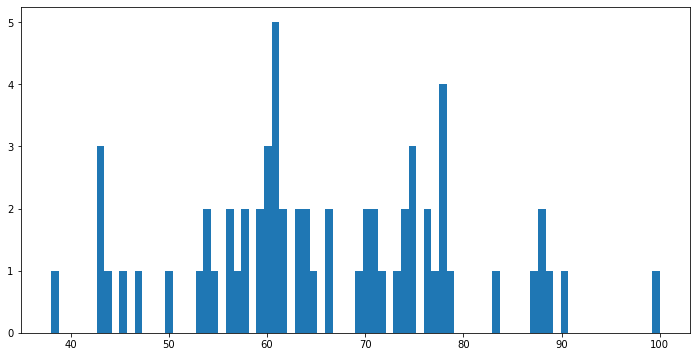

In [196]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
#plt.xlabel("math score")
#plt.ylabel("Frequency")
plt.hist(group_a["math score"], bins=80)
plt.show()

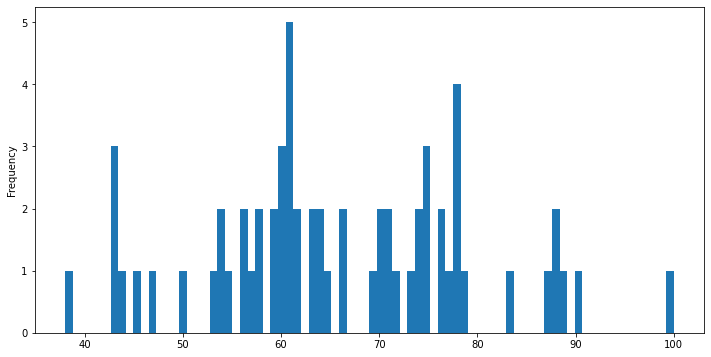

In [180]:
group_a["math score"].plot.hist(bins=80,figsize=(12,6))

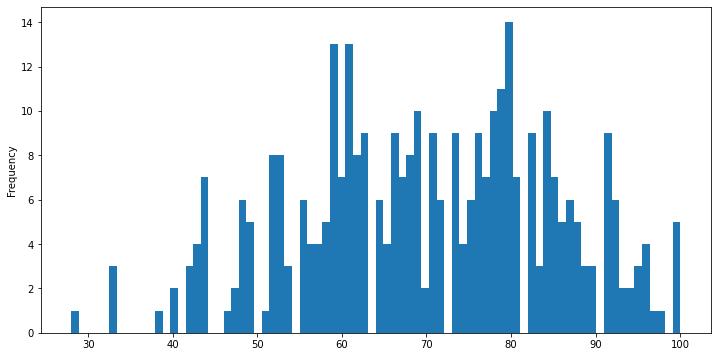

In [194]:
course_completed["math score"].plot.hist(figsize=(12,6), bins=80)

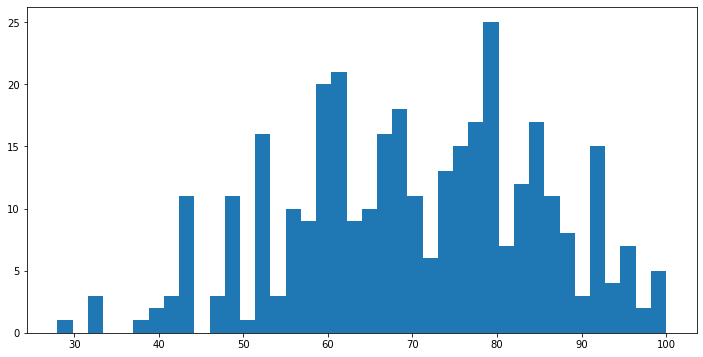

In [201]:
plt.figure(figsize=(12,6))
plt.hist(course_completed["math score"], bins=40)
plt.show()

In [202]:
course_completed["gender"].value_counts()

male      184
female    162
Name: gender, dtype: int64

- Male count in the sub dataset 'course_completed' is more than the female count

- Concatenate the dataframes 'group_a' and 'course_completed'.
- Name the concatenated dataframe as 'concat_data'.
- Select the correct statements for 'concat_data'.

In [203]:
concat_data = pd.concat([group_a, course_completed])

In [204]:
concat_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
19,female,group A,some high school,free/reduced,none,58,80,68
80,male,group A,some high school,free/reduced,none,72,74,69
98,male,group A,some high school,standard,none,45,48,35
109,male,group A,bachelor's degree,free/reduced,none,47,55,53
128,male,group A,associate's degree,standard,completed,100,97,94


In [209]:
concat_data.duplicated().sum()

21

- There are 21 duplicate records in the dataframe 'concat_data'

In [223]:
concat_data[concat_data.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
128,male,group A,associate's degree,standard,completed,100,97,94
157,male,group A,associate's degree,free/reduced,completed,77,84,80
245,female,group A,associate's degree,free/reduced,completed,61,73,68
261,male,group A,some high school,free/reduced,completed,38,35,35
264,female,group A,associate's degree,standard,completed,43,56,57
313,male,group A,bachelor's degree,standard,completed,58,68,70
386,male,group A,some high school,standard,completed,88,94,92
411,male,group A,high school,standard,completed,60,56,55
479,female,group A,high school,standard,completed,83,98,100
484,female,group A,some college,free/reduced,completed,55,58,67


- All the duplicate observations are of those students who belong to race/ethnicity 'group A' and have completed their test preparation course.